In [264]:
# Necessary Modules
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import glob 
from astropy.io import fits
import warnings 
warnings.simplefilter('ignore')
from scipy import ndimage

In [268]:
# Open path for star and flat  
label = '9944137_kp/'
path = '/Users/jessicaschonhut/flares_paper/keck_obs/'
stars = glob.glob(path + label + 'n*.fits')
flat = fits.open(path + 'kp_flat/final_flat.fits')
flat = flat[0].data

4


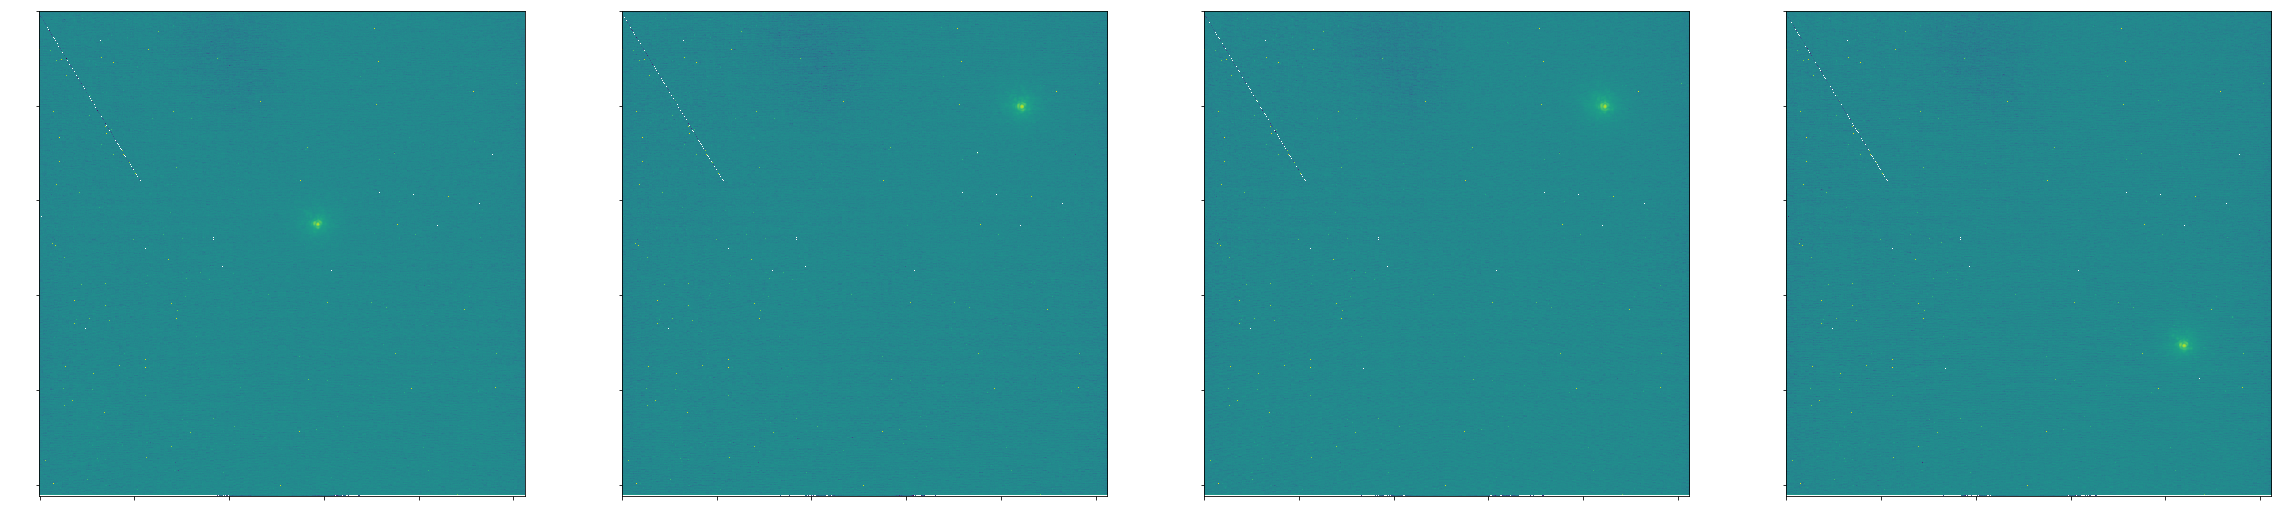

In [269]:
# Plot all fits images
x = np.linspace(1, len(stars), len(stars))

plt.figure(figsize=((len(x)*10), 20))

for z in x:
    star = fits.open(stars[int(z-1)], ignore_missing_end=True)
    star = star[0].data
    plt.subplot(2,len(stars),int(z))
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.imshow(np.log10(star))

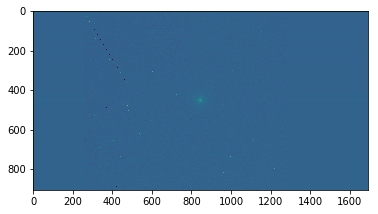

In [198]:
# Open star data 
stars = path + label + 'n0109.fits'
n0109 = fits.open(stars, ignore_missing_end=True)
n0109 = n0109[0].data 

# Divide by flat field 
n0109 = np.divide(n0109, flat)
n0109_log = np.log10(n0109)

# Get rid of nans and infs
n0109_log_nan = np.nan_to_num(n0109_log, copy=False, posinf=2, neginf=2)
plt.imshow(np.log10(n0109_log_nan))
mean = np.mean(n0109_log_nan)

# Centering primary star without rolling
pad_test = np.pad(n0109_log, [(0,0), (258,410)], 'mean') # Padding x axis
n = 120
delete_test = pad_test[:-n, :] # Deleting rows in y axis

# Saving image 
plt.imshow(delete_test)
hdu = fits.PrimaryHDU(delete_test)
hdul = fits.HDUList([hdu])
hdul.writeto(path + label + 'n0109_reduced.fits')

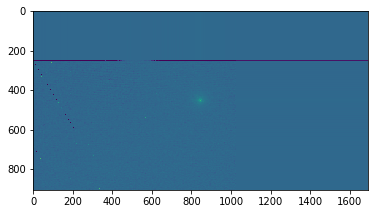

In [200]:
# Open star data 
stars = path + label + 'n0111.fits'
n0111 = fits.open(stars, ignore_missing_end=True)
n0111 = n0111[0].data 

# Divide by flat field 
n0111 = np.divide(n0111, flat)
n0111_log = np.log10(n0111)

# Get rid of nans and infs
n0111_log_nan = np.nan_to_num(n0111_log, copy=False, posinf=2, neginf=2)
plt.imshow(np.log10(n0111_log_nan))
mean = np.mean(n0111_log_nan)

# Centering primary star without rolling
pad_test = np.pad(n0111_log_nan, [(248,248), (3,665)], 'mean') # Padding x axis
n = 616
delete_test = pad_test[:-n, :] # Deleting rows in y axis

# Saving image 
plt.imshow(delete_test)
hdu = fits.PrimaryHDU(delete_test)
hdul = fits.HDUList([hdu])
hdul.writeto(path + label + 'n0111_reduced.fits')

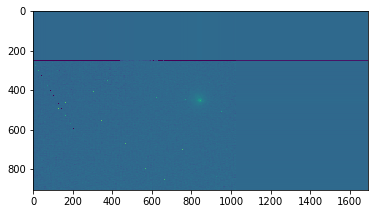

In [189]:
# Open star data 
stars = path + label + 'n0114.fits'
n0114 = fits.open(stars, ignore_missing_end=True)
n0114 = n0114[0].data 

# Divide by flat field 
n0114 = np.divide(n0114, flat)
n0114_log = np.log10(n0114)

# Get rid of nans and infs
n0114_log_nan = np.nan_to_num(n0114_log, copy=False, posinf=2, neginf=2)
plt.imshow(np.log10(n0114_log_nan))
mean = np.mean(n0114_log_nan)

# Centering primary star without rolling
pad_test = np.pad(n0114_log_nan, [(248,248), (0,668)], 'mean') # Padding x axis
n = 616
delete_test = pad_test[:-n, :] # Deleting rows in y axis

# Saving image 
plt.imshow(delete_test)
hdu = fits.PrimaryHDU(delete_test)
hdul = fits.HDUList([hdu])
hdul.writeto(path + label + 'n0114_reduced.fits')

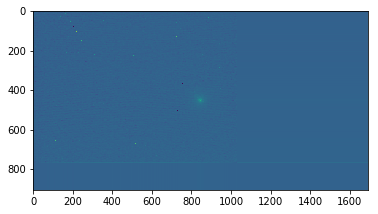

In [204]:
# Open star data 
stars = path + label + 'n0115.fits'
n0115 = fits.open(stars, ignore_missing_end=True)
n0115 = n0115[0].data 

# Divide by flat field 
n0115 = np.divide(n0115, flat)
n0115_log = np.log10(n0115)

# Get rid of nans and infs
n0115_log_nan = np.nan_to_num(n0115_log, copy=False, posinf=2, neginf=2)
plt.imshow(np.log10(n0115_log_nan))
mean = np.mean(n0115_log_nan)

# Centering primary star without rolling
pad_test = np.pad(n0115_log_nan, [(136,136), (7,661)], 'mean') # Padding x axis
n = 392
delete_test = pad_test[n:, :] # Deleting rows in y axis

# Saving image 
plt.imshow(delete_test)
hdu = fits.PrimaryHDU(delete_test)
hdul = fits.HDUList([hdu])
hdul.writeto(path + label + 'n0115_reduced.fits')

In [236]:
new_stars = glob.glob(path + label + 'n*_reduced.fits')
result_array = np.array([])

image_concat = [fits.getdata(image) for image in new_stars]
final_image = np.sum(image_concat, axis=0)

In [261]:
final_image[final_image < 8] = 10

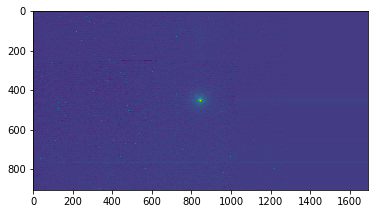

In [262]:
plt.imshow(final_image)
hdu = fits.PrimaryHDU(final_image)
hdul = fits.HDUList([hdu])
hdul.writeto(path + label + 'final_reduction.fits')